In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":10,"axes.titlesize":24,"axes.labelsize":24})   

In [2]:
train = pd.read_csv('train.csv')
train.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,0,...,1,12.0,5,-6,48,1022,-5,5.0,0.0,46


In [3]:
test = pd.read_csv('test.csv')
test.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,Region_AreaKM2,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,6,14.0,5,-1,46,1011,2,10.0,0.00,180
1,1000,02/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,4,12.0,6,-1,52,1009,3,10.0,5.08,315
2,1000,03/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,3,13.0,11,-3,41,1013,-2,10.0,0.00,210
3,1000,04/03/2018,0,0,0,Hyper Market,General,326,7,9643,...,6,11.0,18,-2,65,1002,1,6.0,3.05,193
4,1000,05/03/2018,0,1,1,Hyper Market,General,326,7,9643,...,6,10.0,23,-5,25,1000,2,8.0,0.25,247


In [4]:
train.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,523021.000000,523021.000000,523021.000000,523021.000000,523021.00000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,...,523021.000000,511683.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,511683.000000,523021.000000,523021.000000
mean,1373.953914,0.029718,0.829714,0.383292,8002.71122,5.713151,259.325073,4057.377536,12381.265718,14050.547848,...,10.273205,12.151025,11.724961,3.737584,51.375624,1012.078435,6.202315,7.223408,0.808278,170.458096
std,216.395820,0.169808,0.375884,0.486189,11537.70753,3.357190,185.857102,2729.630381,9140.692427,2755.425404,...,7.041167,4.978385,5.791031,5.909098,19.284023,8.699236,6.312993,4.899575,2.631428,101.728193
min,1000.000000,0.000000,0.000000,0.000000,47.00000,0.000000,0.000000,0.000000,344.000000,9893.000000,...,-13.000000,0.000000,2.000000,-18.000000,10.000000,970.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.00000,3.000000,166.000000,2573.000000,7215.000000,11849.000000,...,4.000000,10.000000,8.000000,-1.000000,36.000000,1007.000000,1.000000,3.000000,0.000000,75.000000
50%,1373.000000,0.000000,1.000000,0.000000,3321.00000,6.000000,251.000000,4020.000000,9643.000000,15017.000000,...,11.000000,11.000000,11.000000,4.000000,51.000000,1013.000000,7.000000,8.000000,0.000000,191.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.00000,9.000000,345.000000,5538.000000,15566.000000,15931.000000,...,16.000000,14.000000,14.000000,8.000000,66.000000,1018.000000,11.000000,10.000000,0.250000,250.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.00000,10.000000,2206.000000,26641.000000,32221.000000,23931.000000,...,30.000000,31.000000,53.000000,18.000000,100.000000,1038.000000,24.000000,31.000000,58.930000,360.000000


In [6]:
train.describe(include=['O'])

,Date,StoreType,AssortmentType,Events
count,523021,523021,523021,398923
unique,729,4,3,21
top,09/01/2018,Hyper Market,General,Rain
freq,749,292769,296188,204733


## Scatterplotting!

Correlazioni di features in training set (con target)

In [ ]:
cov=train.corr(method='pearson')
cm = sns.clustermap(cov, annot=True, center=0, cmap="Blues", figsize=(16, 16))
cm.cax.set_visible(False)

In [7]:
test.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,Region_AreaKM2,Region_GDP,Region_PopulationK,CloudCover,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,37271.00000,...,45689.000000,43068.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,43068.000000,45689.000000,45689.000000
mean,1374.000000,0.032787,0.822649,0.344262,7958.004005,5.556742,13216.973298,14140.499332,3940.098798,5.45797,...,7.009433,13.428323,12.471208,-1.208124,39.309549,1016.101381,1.852853,8.084959,0.462545,188.977522
std,216.219849,0.178080,0.381970,0.475132,11429.943820,3.369348,9793.699417,2730.696157,2782.135496,1.73856,...,3.530816,5.323993,6.766945,3.232898,15.820149,10.503942,3.287485,5.209967,1.275447,112.300400
min,1000.000000,0.000000,0.000000,0.000000,47.000000,0.000000,344.000000,9893.000000,816.000000,0.00000,...,-2.000000,2.000000,3.000000,-13.000000,8.000000,979.000000,-6.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.000000,2.000000,7215.000000,11849.000000,1584.000000,5.00000,...,4.000000,10.000000,8.000000,-3.000000,28.000000,1010.000000,0.000000,5.000000,0.000000,71.000000
50%,1374.000000,0.000000,1.000000,0.000000,3307.000000,6.000000,9643.000000,15017.000000,2770.000000,6.00000,...,7.000000,12.000000,11.000000,-1.000000,37.000000,1018.000000,2.000000,9.000000,0.000000,225.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.000000,9.000000,15566.000000,16186.000000,5727.000000,6.00000,...,9.000000,16.000000,14.000000,1.000000,50.000000,1024.000000,4.000000,10.000000,0.000000,273.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.000000,10.000000,32221.000000,23931.000000,8146.000000,8.00000,...,17.000000,31.000000,39.000000,9.000000,87.000000,1035.000000,12.000000,31.000000,11.940000,360.000000


In [8]:
test.describe(include=['O'])

,Date,StoreType,AssortmentType,Events
count,45689,45689,45689,29248
unique,61,4,3,14
top,31/03/2018,Hyper Market,General,Rain
freq,749,25437,26108,15983


## Merging training and test for preprocessing

Salvo i target a parte e all_data contiene train senza target + test

In [ ]:
target=train[['NumberOfCustomers','NumberOfSales']]
train_notarget=train.copy()
train_notarget=train_notarget.columns.drop(['NumberOfCustomers','NumberOfSales'])
all_data=pd.concat([train[train_notarget],test])

## Creation of new features

Funzione per estrarre da Events una feature per ogni Event tenendo conto delle combinazioni. Aggiorna automaticamente il dataframe con le nuove features booleane.

In [ ]:
def ExtractEvents(df,col,sep):
    df[col]=df[col].astype('str').apply(lambda x: 'Nothing' if x=='nan' else x)
    events=list(df[col].unique())
    for event in events:
        if sep in event:
            event=event.split(sep)
            for i in event:
                events.append(i)
    events=list({x for x in events if sep not in x})
    for event in events:
        df[event]=df[col].astype('str').apply(lambda x: 1 if event in x else 0)
    return df.drop(col)

all_data=ExtractEvents(all_data,'Events','-')
all_data[['Snow','Rain','Nothing']] #per esempio

# Pietro

In [5]:
categorical_variables_mask = train.dtypes == object
categorical_variables = train.columns[categorical_variables_mask]

categorical_variables = categorical_variables.append(pd.Index(['Region', 'IsHoliday', 'IsOpen','HasPromotions']))
categorical_variables

Index(['Date', 'StoreType', 'AssortmentType', 'Events', 'Region', 'IsHoliday',
       'IsOpen', 'HasPromotions'],
      dtype='object')

In [17]:
numerical_var = train.columns[~categorical_variables_mask]
numerical_var.drop('Region')
numerical_var.drop('IsHoliday')
numerical_var.drop('IsOpen')
numerical_var.drop('HasPromotions')

Index(['StoreID', 'IsHoliday', 'IsOpen', 'NearestCompetitor', 'Region',
       'NumberOfCustomers', 'NumberOfSales', 'Region_AreaKM2', 'Region_GDP',
       'Region_PopulationK', 'CloudCover', 'Max_Dew_PointC',
       'Max_Gust_SpeedKm_h', 'Max_Humidity', 'Max_Sea_Level_PressurehPa',
       'Max_TemperatureC', 'Max_VisibilityKm', 'Max_Wind_SpeedKm_h',
       'Mean_Dew_PointC', 'Mean_Humidity', 'Mean_Sea_Level_PressurehPa',
       'Mean_TemperatureC', 'Mean_VisibilityKm', 'Mean_Wind_SpeedKm_h',
       'Min_Dew_PointC', 'Min_Humidity', 'Min_Sea_Level_PressurehPa',
       'Min_TemperatureC', 'Min_VisibilitykM', 'Precipitationmm',
       'WindDirDegrees'],
      dtype='object')

# Missing Values

In [11]:
ratios = (train.isnull().sum() / len(train))*100
all_data_na = ratios.drop(ratios[ratios == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(10)

,Missing Ratio
Max_Gust_SpeedKm_h,78.380600
Events,23.727154
CloudCover,7.873680
Min_VisibilitykM,2.167791
Mean_VisibilityKm,2.167791
Max_VisibilityKm,2.167791


Text(0.5,1,'Top Variables for % of Missing Values')

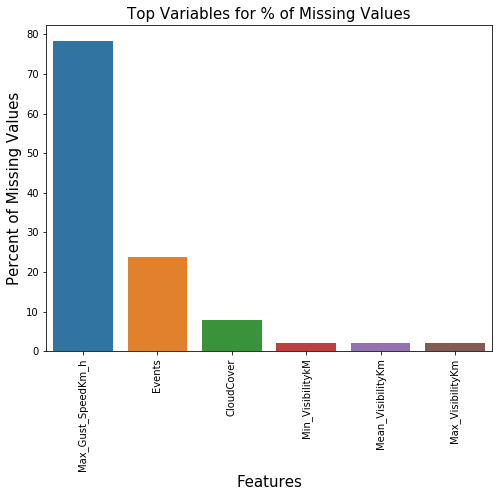

In [12]:
plt.subplots(figsize=(8,6))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index[:10], y=all_data_na[:10])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Top Variables for % of Missing Values', fontsize=15)

In [13]:
ratios = (test.isnull().sum() / len(test))*100
all_data_na = ratios.drop(ratios[ratios == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(10)

,Missing Ratio
Max_Gust_SpeedKm_h,75.374817
Events,35.984591
CloudCover,18.424566
Min_VisibilitykM,5.736611
Mean_VisibilityKm,5.736611
Max_VisibilityKm,5.736611


NameError: name 'all_data_na' is not defined

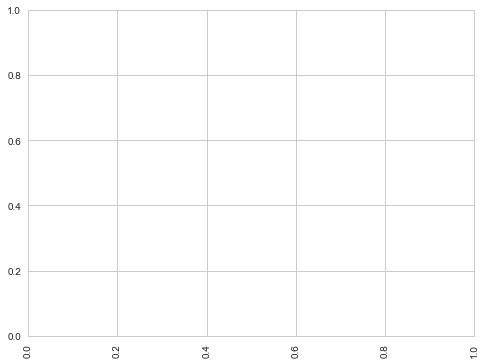

In [13]:
plt.subplots(figsize=(8,6))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index[:10], y=all_data_na[:10])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Top Variables for % of Missing Values', fontsize=15)

## Categorical su NumberOfSales 

In [7]:
sns.set(style="whitegrid", color_codes=True)
indexes = categorical_variables.drop('Date')
indexes = indexes.drop('Events')

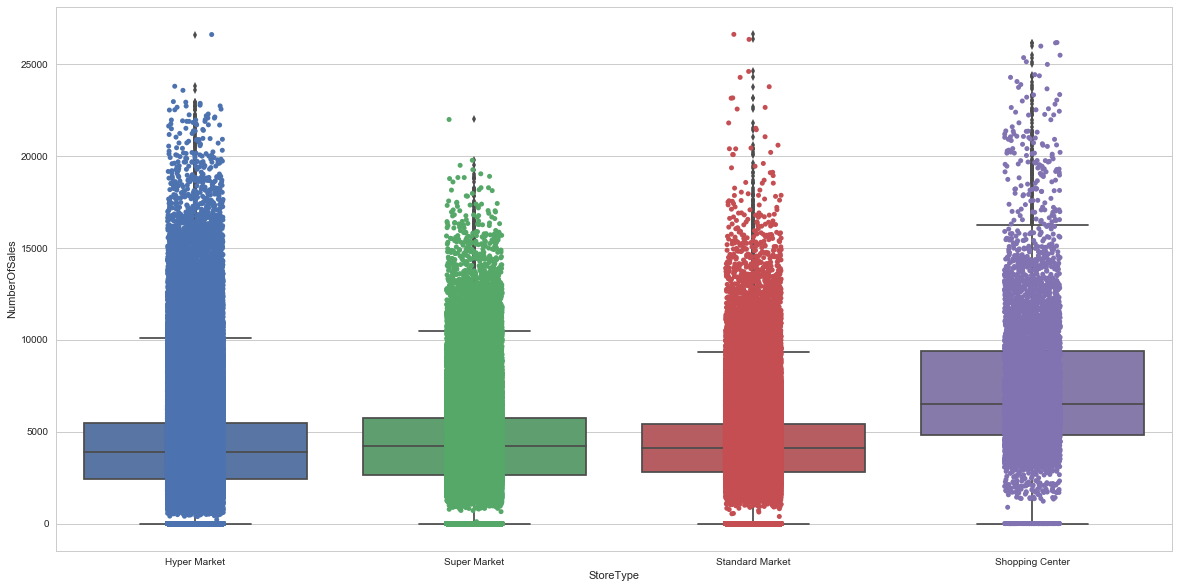

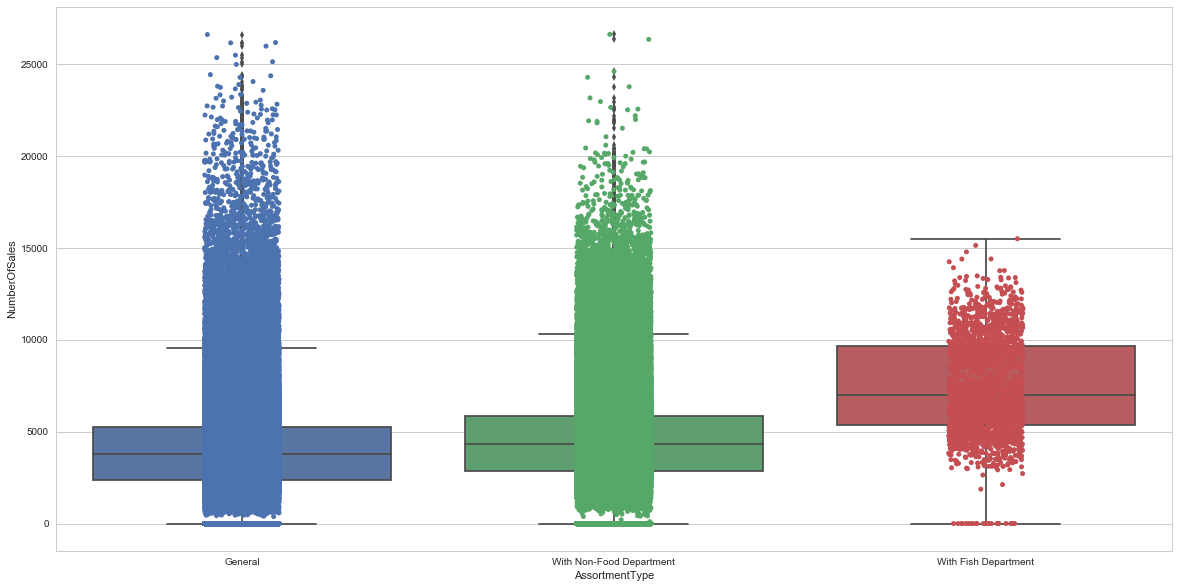

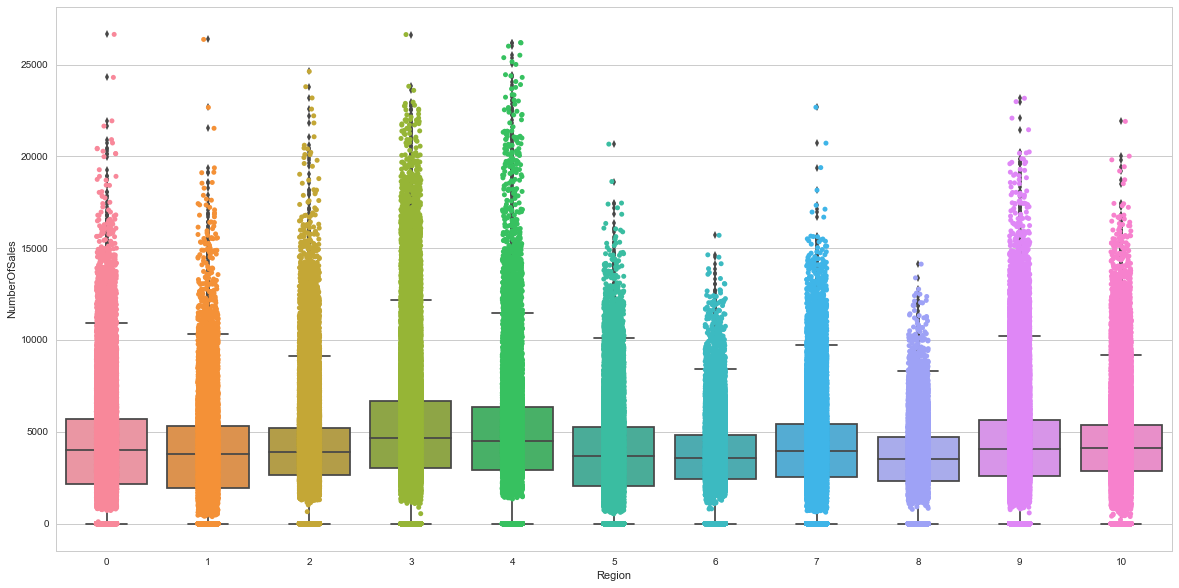

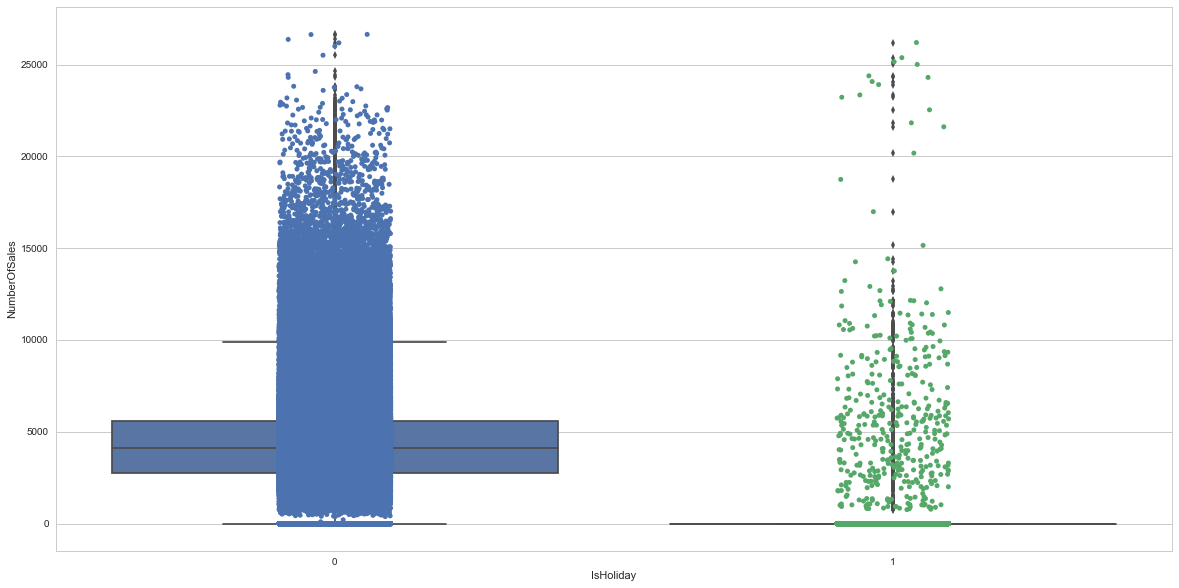

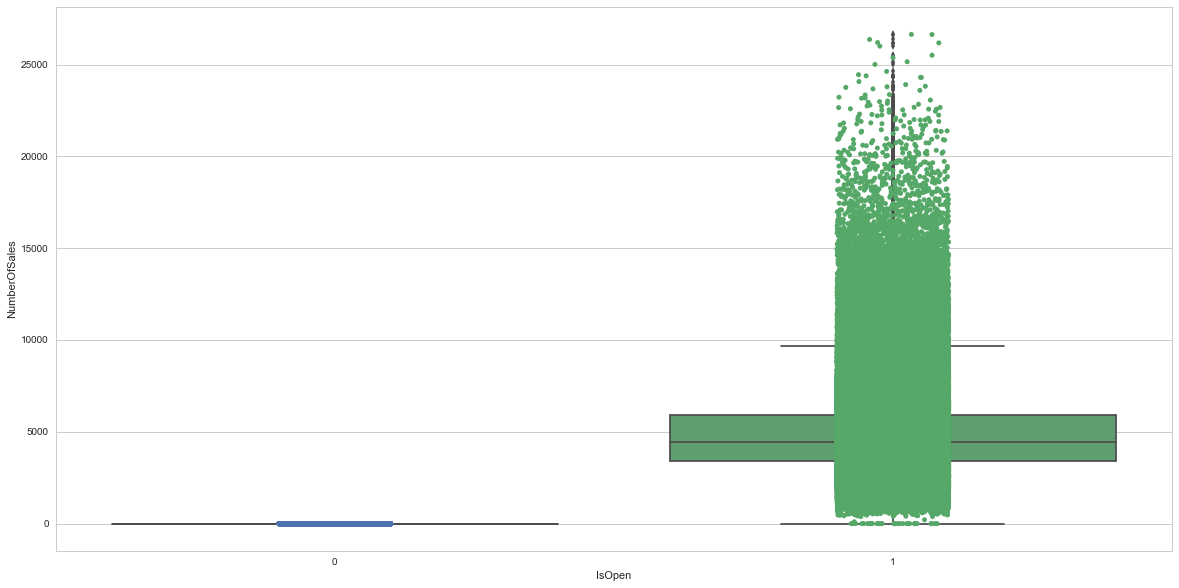

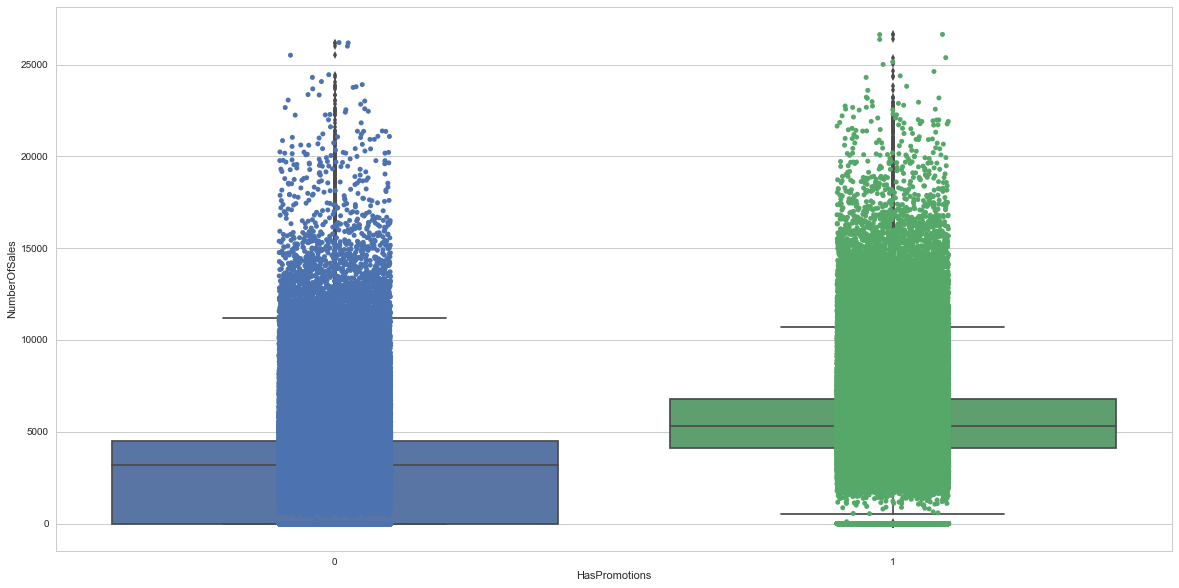

In [6]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
for v in indexes:
    plt.figure(figsize=(20,10))   #this is the way to set the size of the following figure, i need to add it at each new figure
    sns.boxplot(x=v, y="NumberOfSales", data=train)
    sns.stripplot(x=v, y="NumberOfSales", data=train,jitter=True)

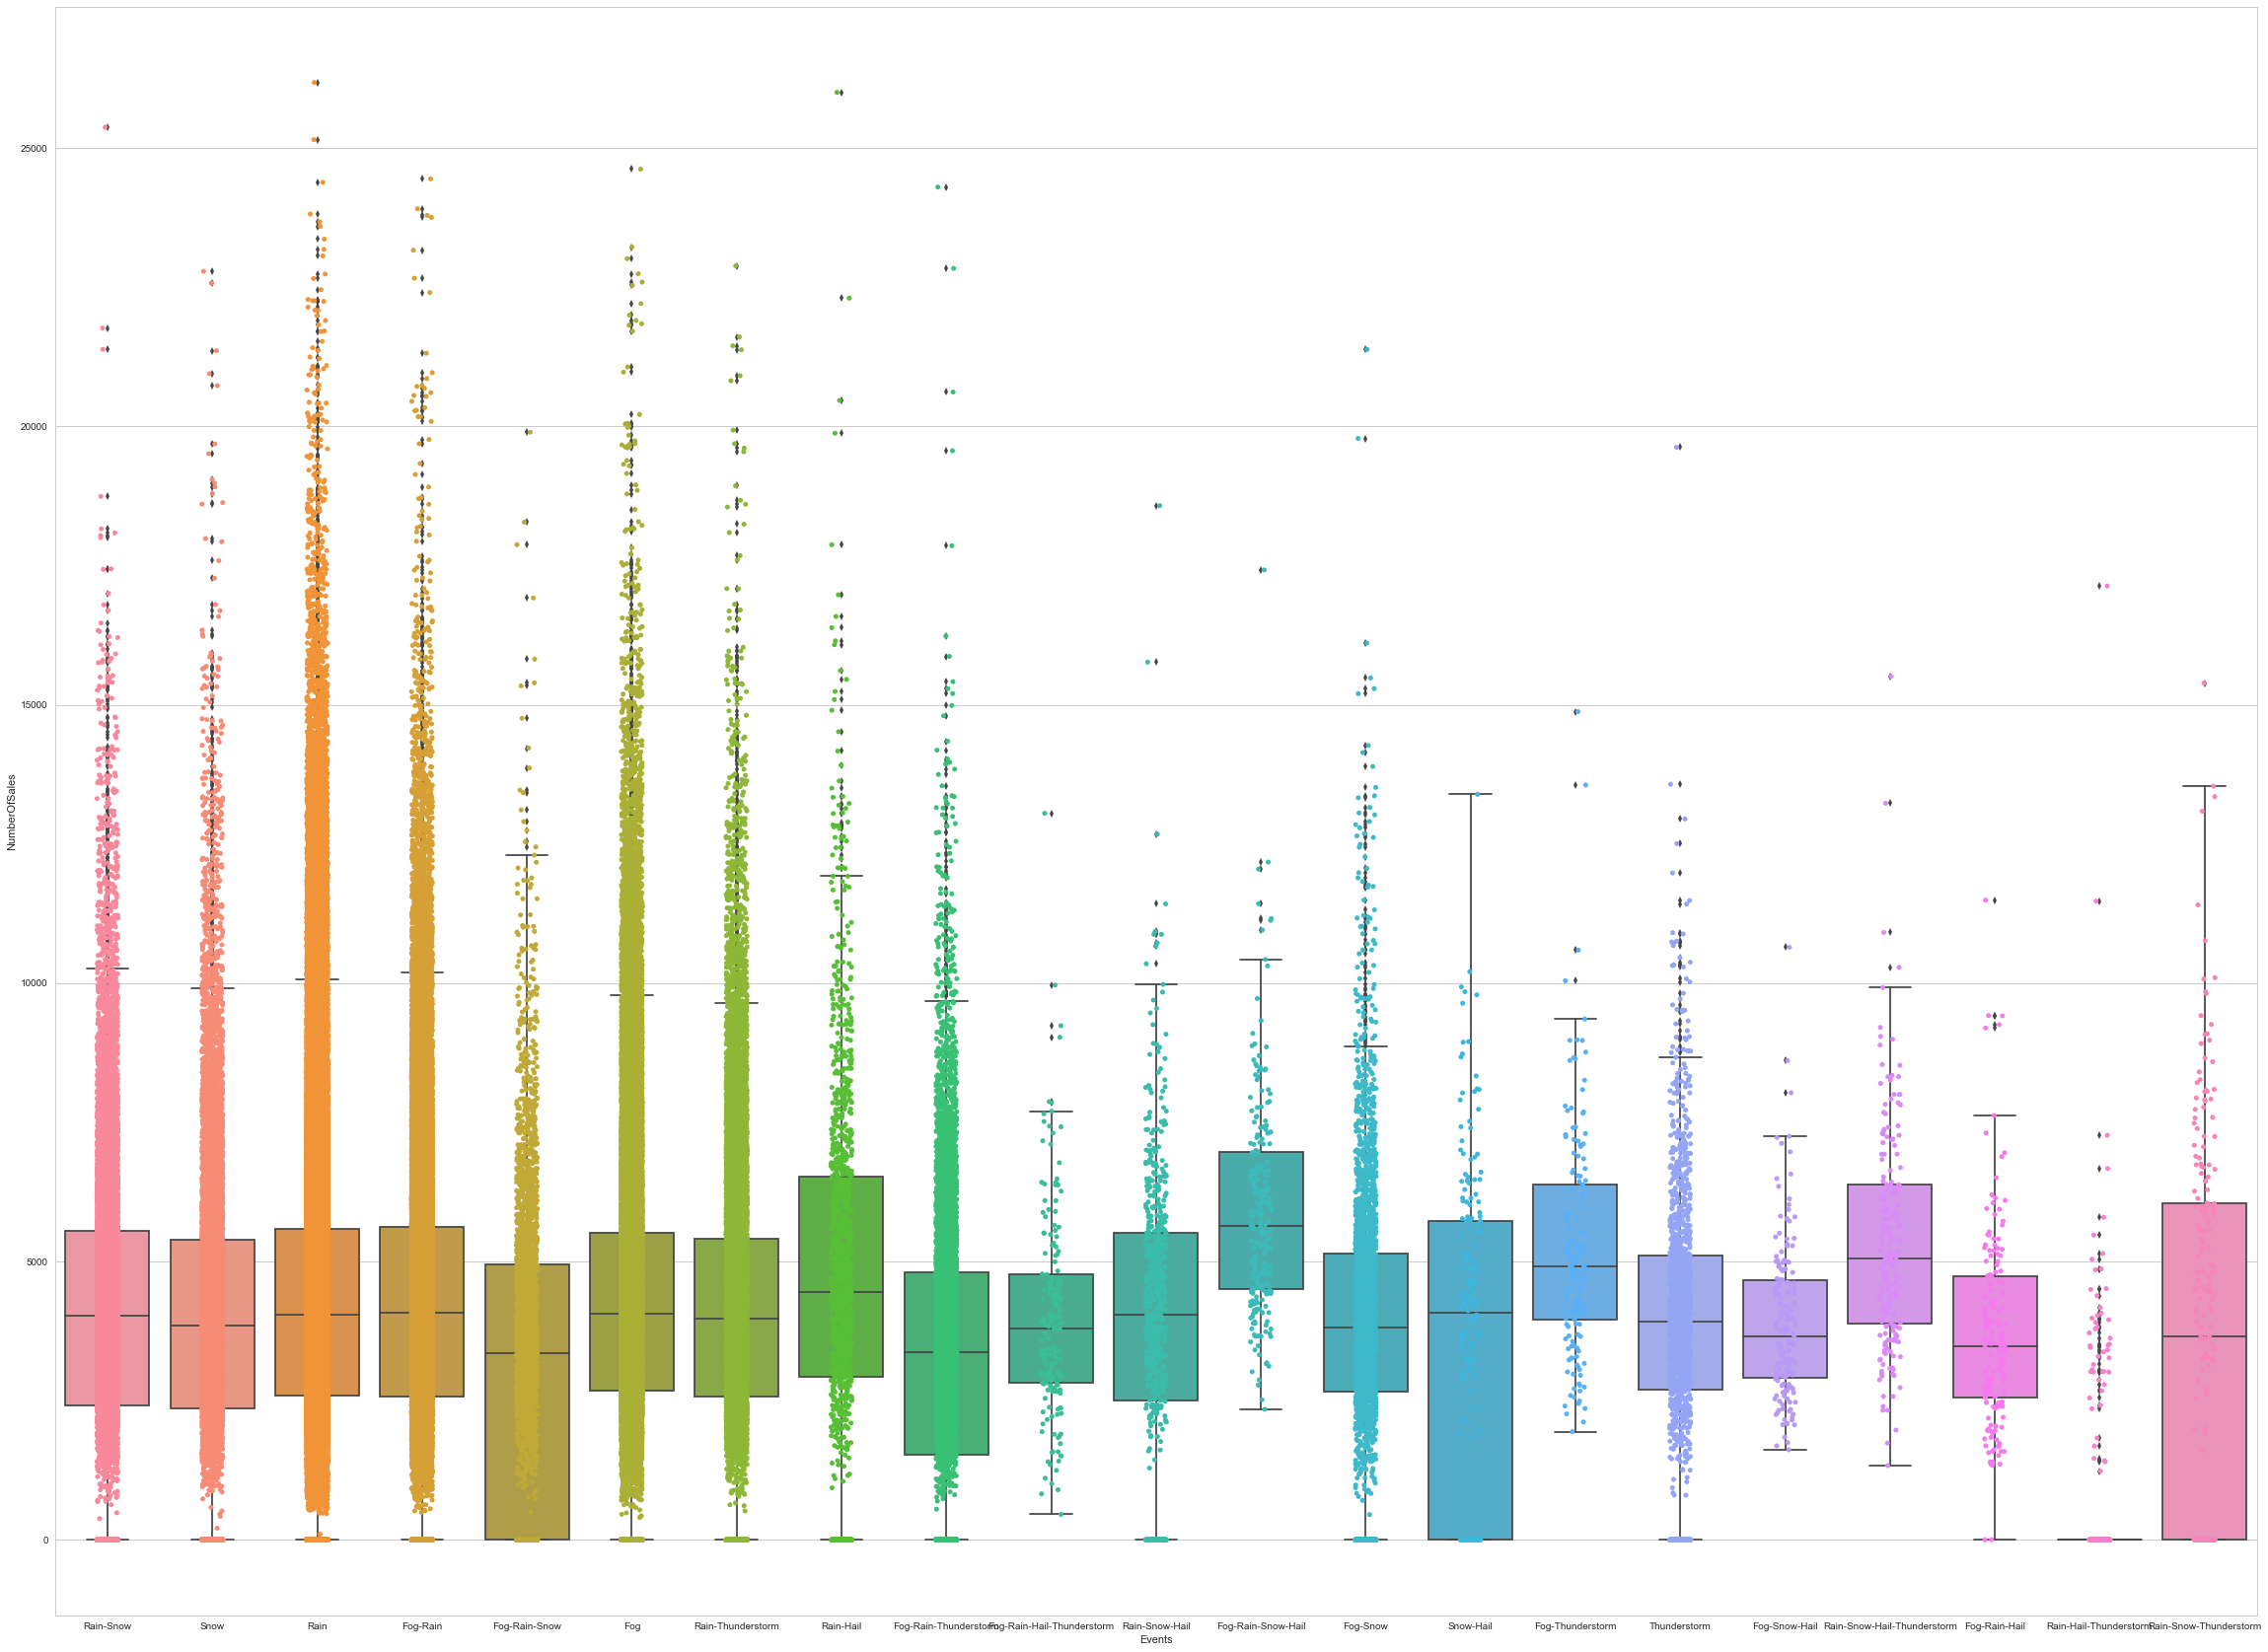

In [18]:
plt.figure(figsize=(40,30))
sns.set_context("notebook", font_scale=0.0, rc={"lines.linewidth": 1})
sns.boxplot(x="Events", y="NumberOfSales", data=train)
sns.stripplot(x="Events", y="NumberOfSales", data=train,jitter=True)

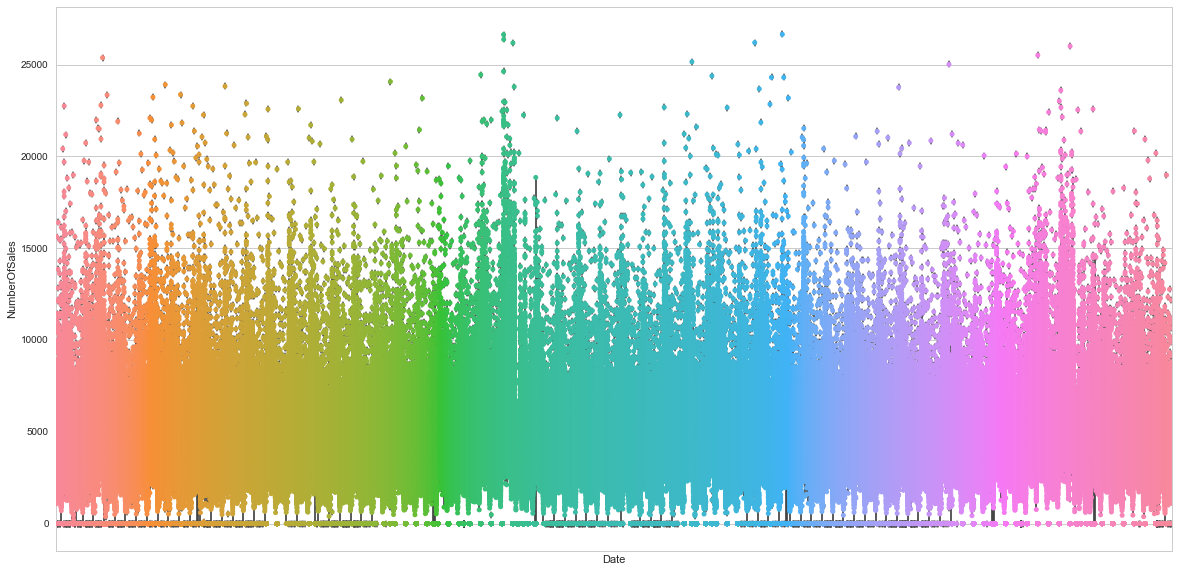

In [11]:
plt.figure(figsize=(40,30))
sns.set_context("notebook", font_scale=0.0, rc={"lines.linewidth": 1})
sns.stripplot(x="Date", y="NumberOfSales", data=train,jitter=True)

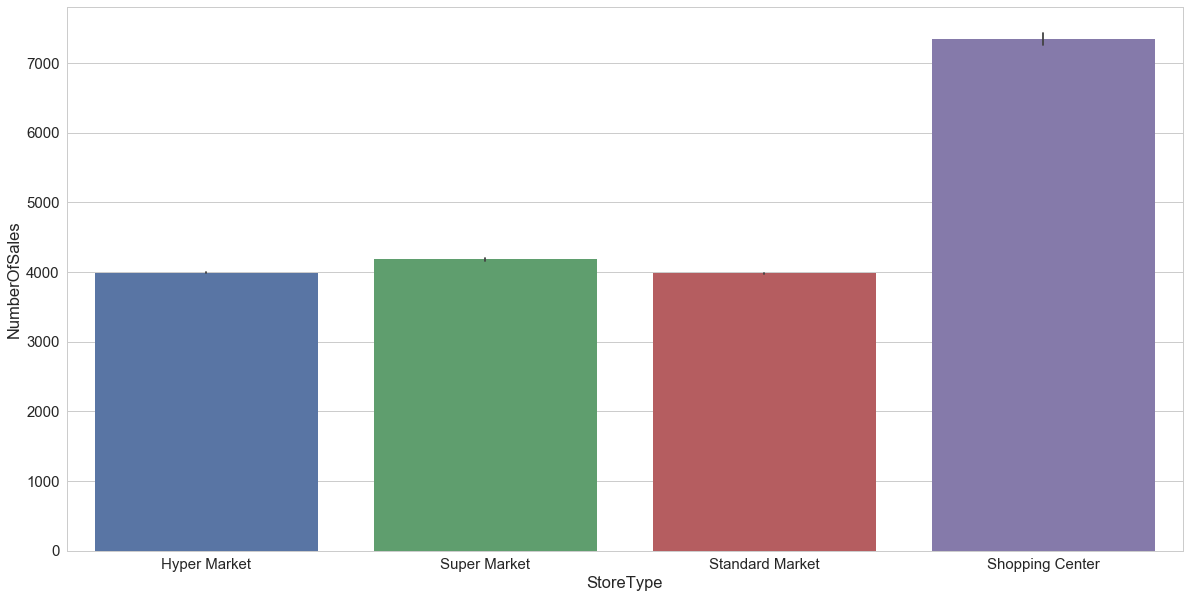

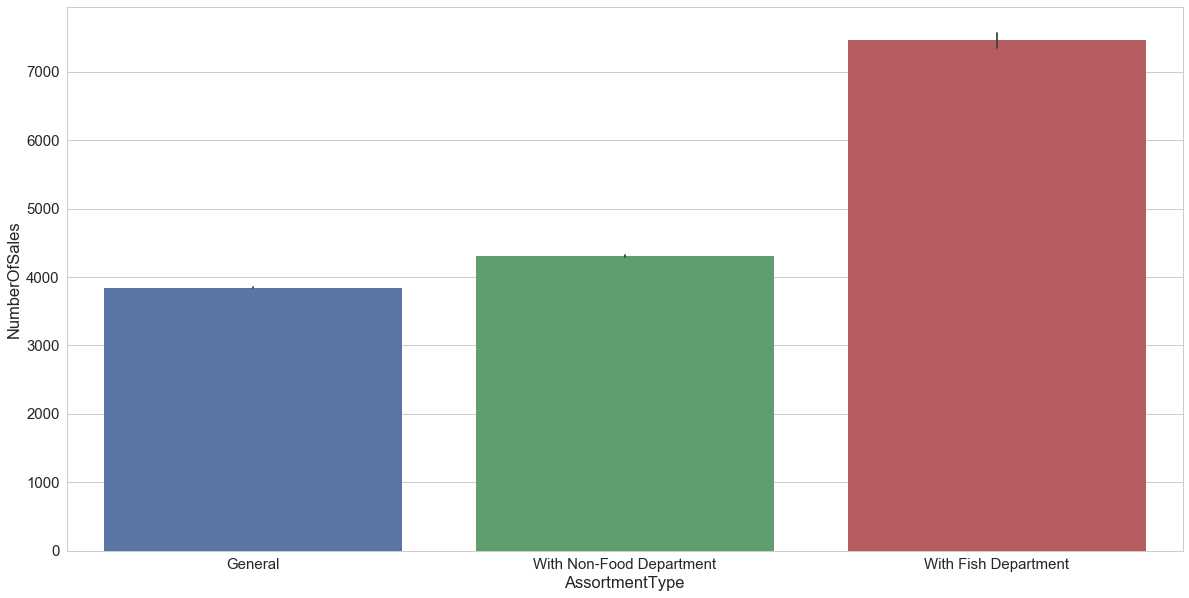

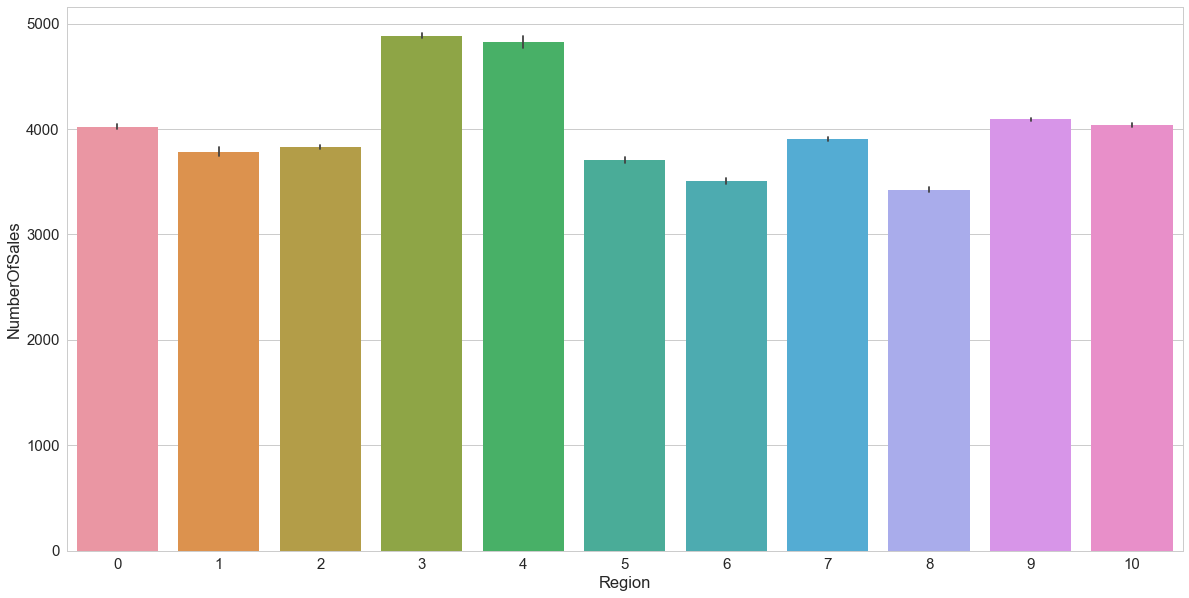

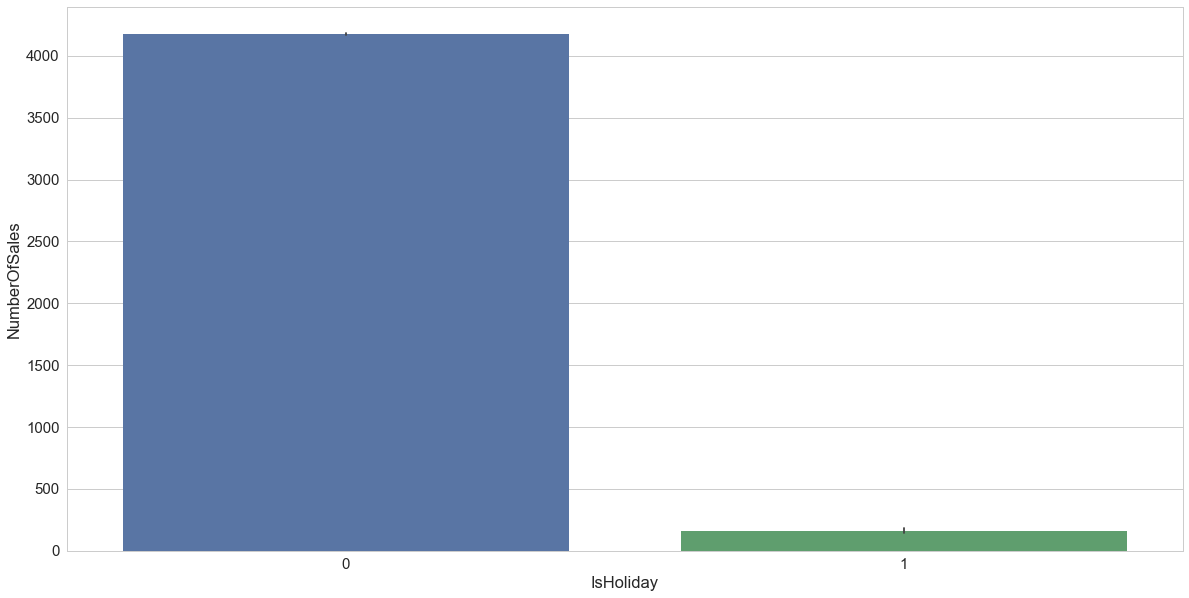

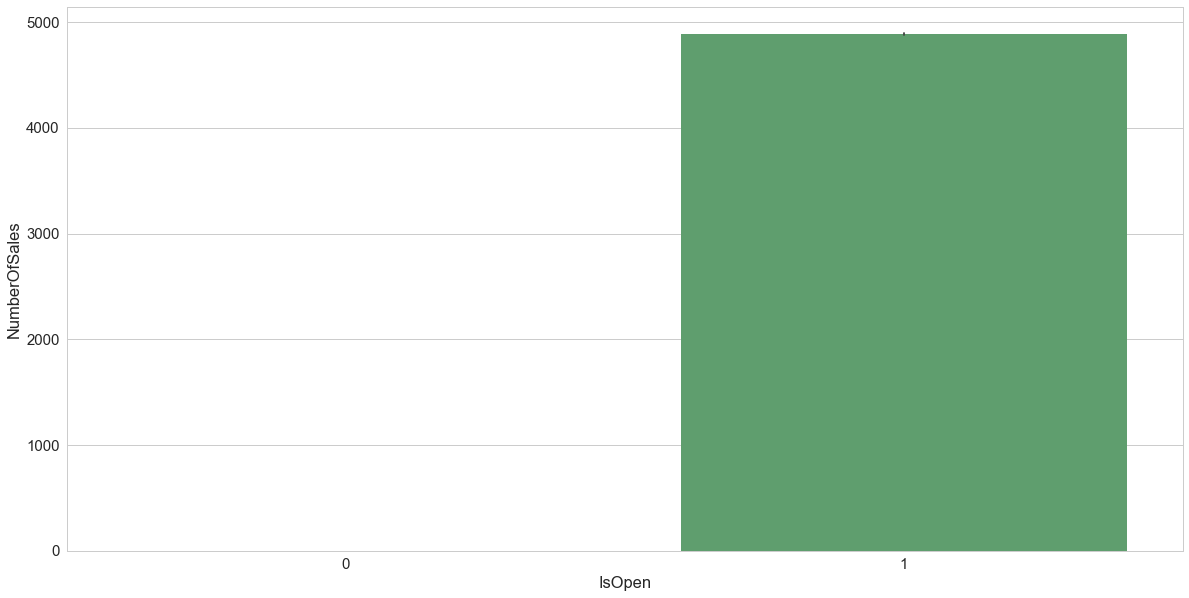

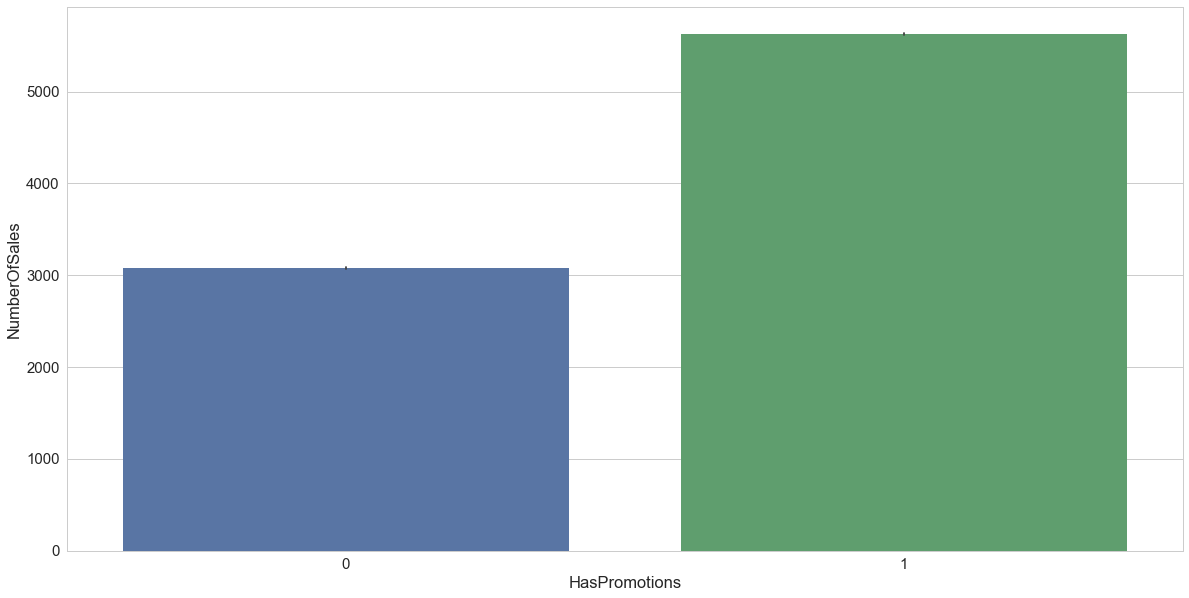

In [16]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
for v in indexes:
    plt.figure(figsize=(20,10))   #this is the way to set the size of the following figure, i need to add it at each new figure
    sns.barplot(x=v, y="NumberOfSales", data=train);  

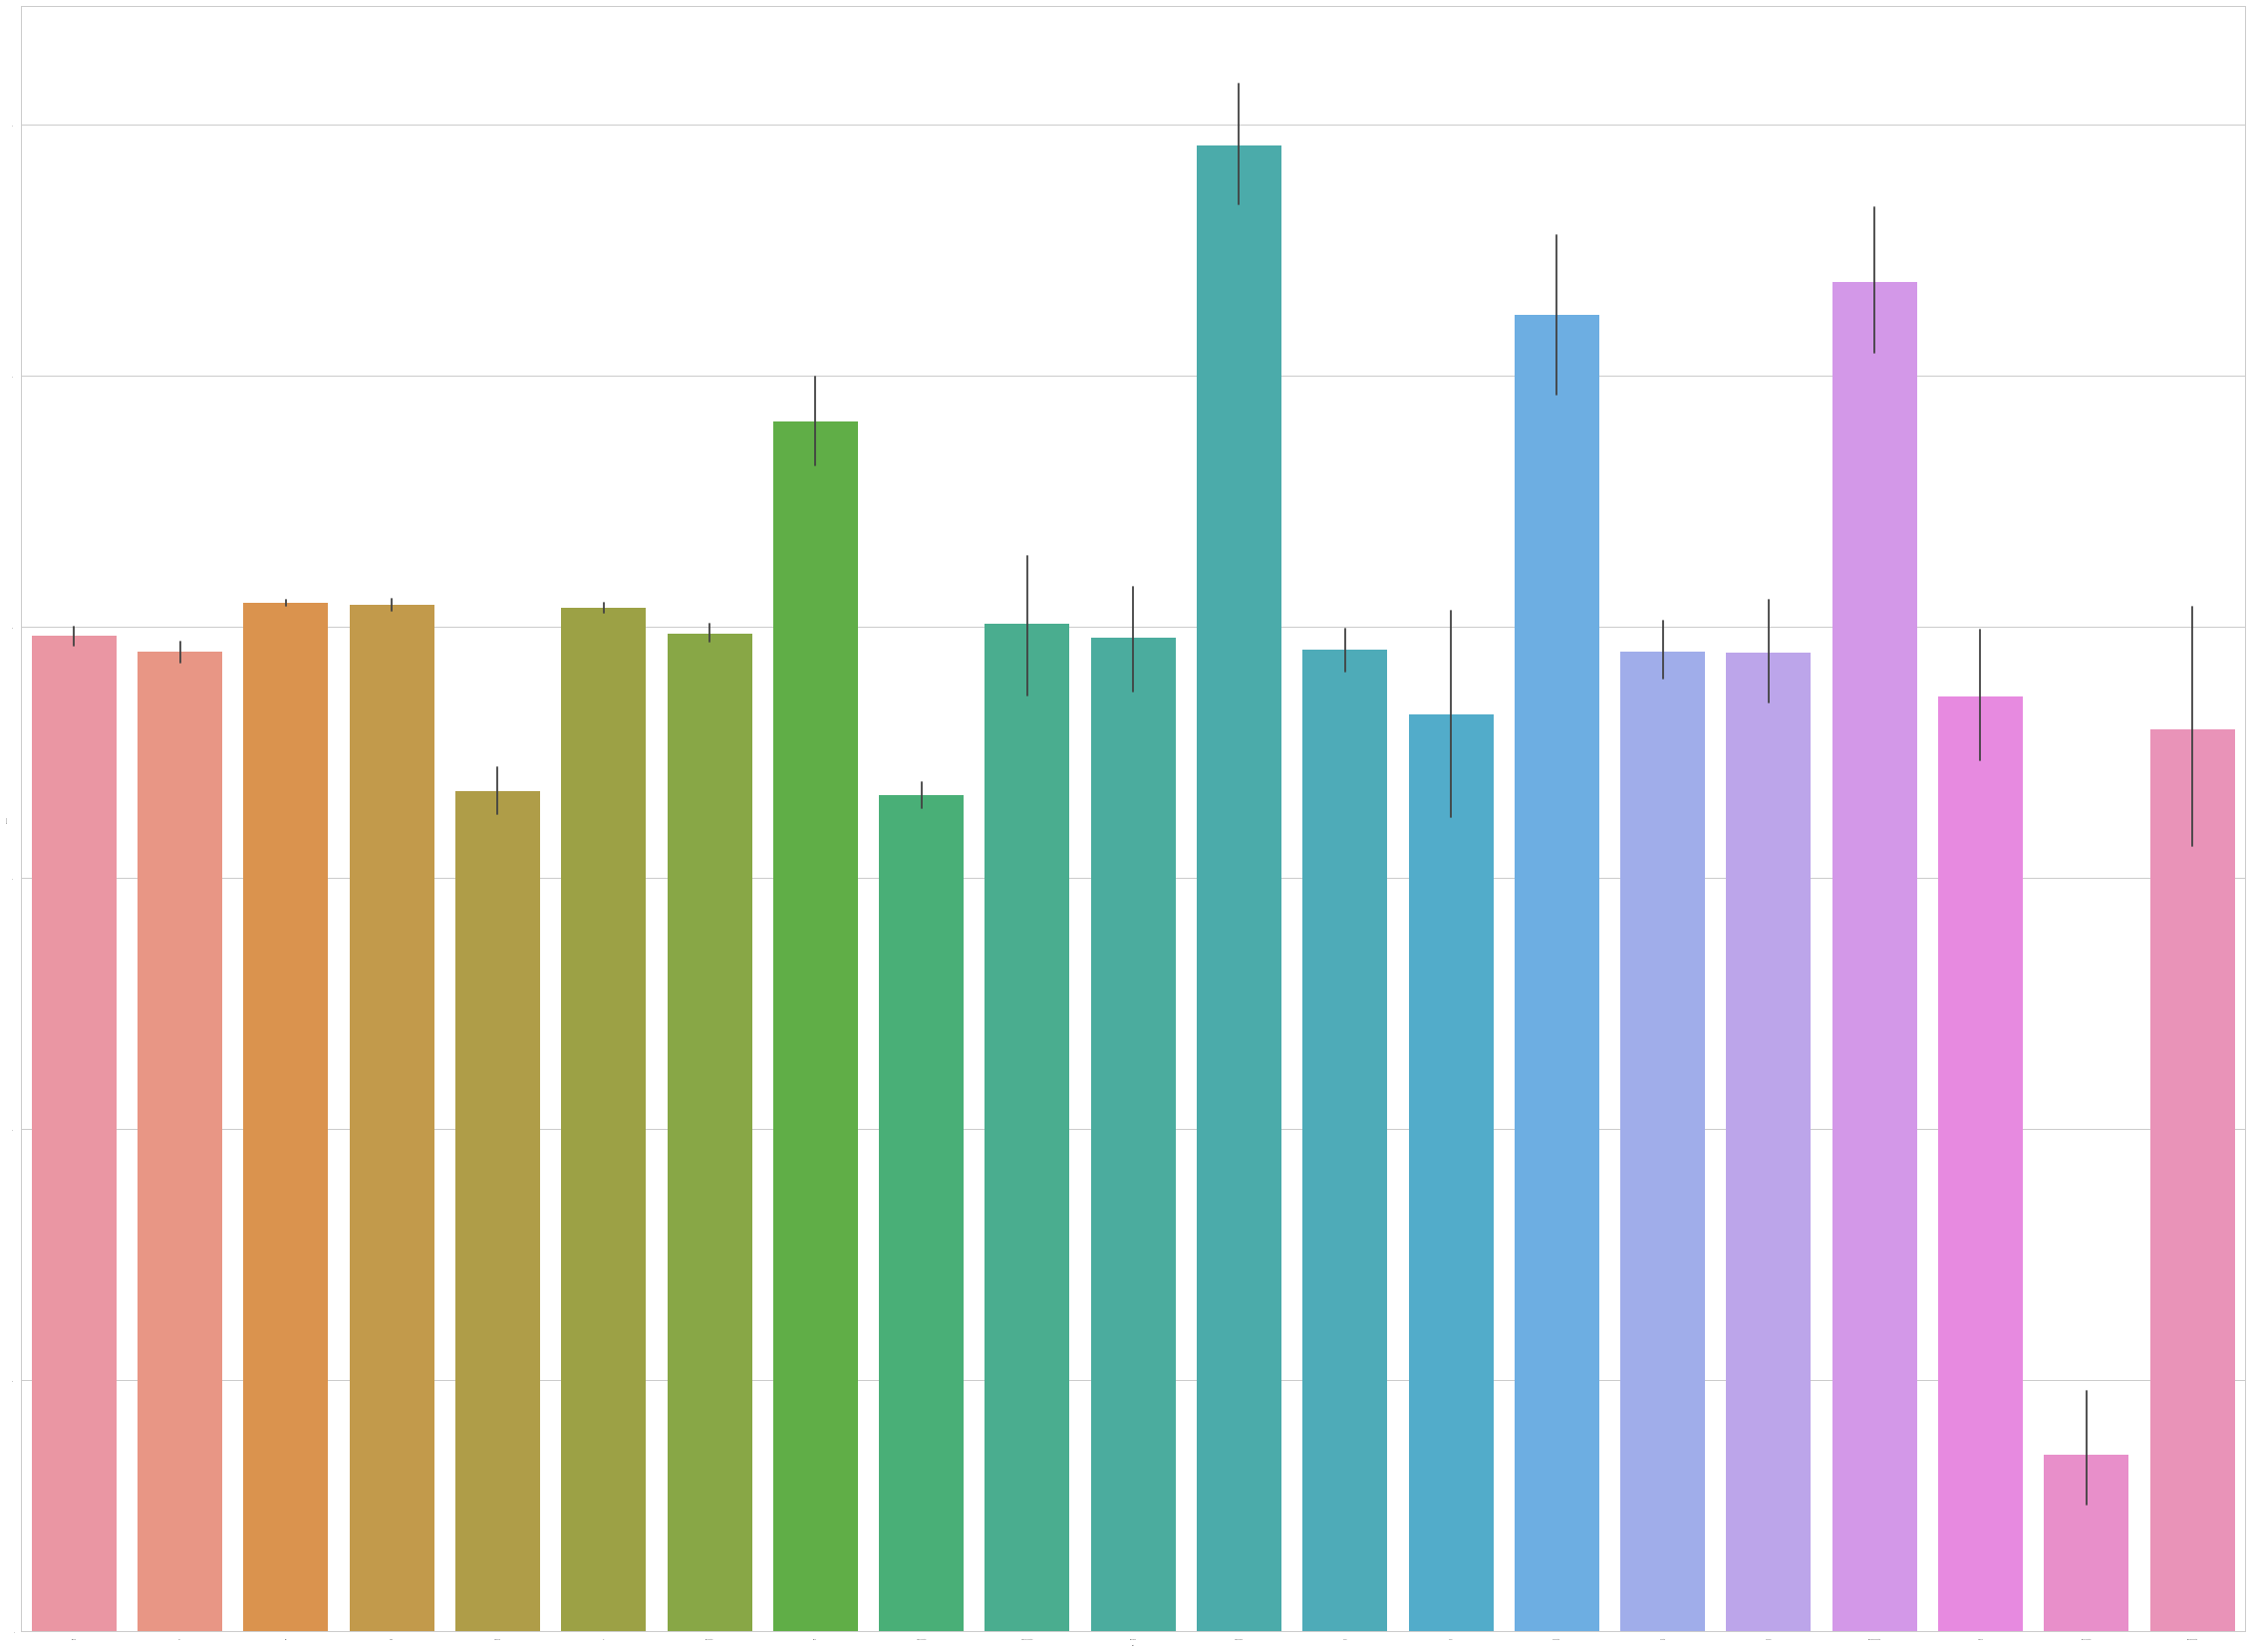

In [15]:
plt.figure(figsize=(40,30))
sns.set_context("notebook", font_scale=0.0, rc={"lines.linewidth": 1})
sns.barplot(x="Events", y="NumberOfSales", data=train);  

In [11]:
# Confronta le medie 
train.groupby(['StoreType']).mean()['NumberOfSales']

StoreType
Hyper Market       3991.943747
Shopping Center    7346.569578
Standard Market    3978.650585
Super Market       4181.944957
Name: NumberOfSales, dtype: float64